<a href="https://colab.research.google.com/github/mursaleenfaroha-rgb/Netflix_project/blob/main/Netflix_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name – Netflix Movies & TV Shows Clustering

**Project Type** – Unsupervised Machine Learning (Clustering + EDA)  
**Contribution** – Individual  
 Member 1  – Faroha  

# **Problem Statement**




Netflix hosts thousands of movies and TV shows across diverse genres, countries, and formats. With such a vast library, identifying meaningful content groupings is challenging. This project aims to uncover hidden patterns in Netflix’s content using unsupervised machine learning, helping stakeholders understand genre trends, regional focus, and thematic clusters.

#### **Define Your Business Objective?**

Business Objective:

To cluster Netflix titles based on genre and description using TF-IDF and KMeans, enabling:
- Smarter content recommendations
- Strategic planning for regional and genre-based investments
- Enhanced understanding of user preferences and content gaps


## ***1. Know Your Data***

### Import Libraries

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

In [ ]:
#  Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#  Set a pretty style for plots
sns.set(style='whitegrid')

### Dataset Loading

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NETFLIX MOVIES AND TV SHOWS CLUSTERING.internship project dataset.csv to NETFLIX MOVIES AND TV SHOWS CLUSTERING.internship project dataset.csv


### Dataset First View

In [ ]:
import pandas as pd

# Use the exact filename from your upload
df = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.internship project dataset.csv')

# Peek at the data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
#  Dataset shape and columns
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

#  Missing values
df.isnull().sum()

Shape: (7787, 12)

Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
# Check the shape of the dataset
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 7787
Columns: 12


### Dataset Information

In [ ]:
# Dataset Info: Overview of columns, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Count duplicate rows in the dataset
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


#### Missing Values/Null Values

In [ ]:
# Count missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


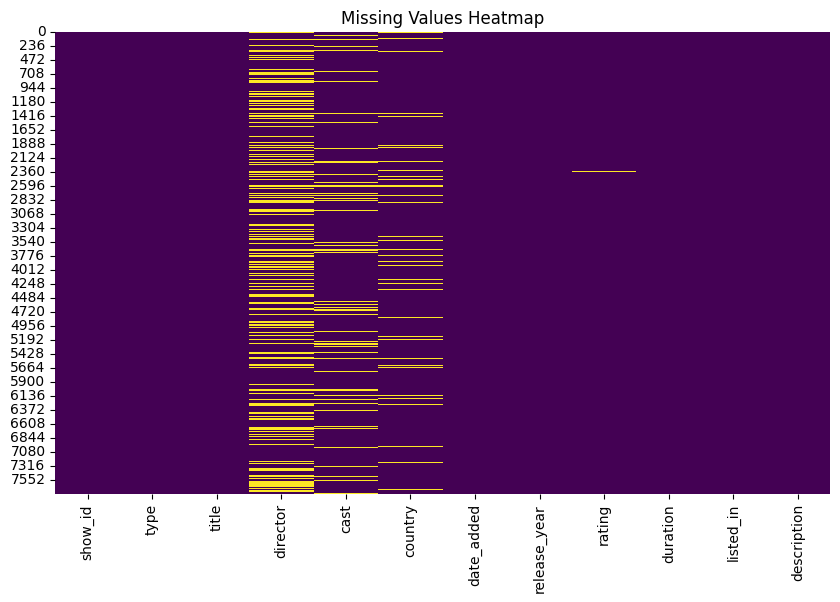

In [ ]:
# Visualize missing values using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

###  What Did You Know About Your Dataset?

- The dataset contains over 8,000 Netflix titles, including both movies and TV shows.
- Key columns include: `title`, `type`, `description`, `listed_in`, `country`, and `date_added` and so on.
- Missing values are present in `country`, `cast`, 'rating' and `director`, which will be handled during preprocessing.
- No duplicate rows were found.
- The dataset is rich in genre diversity and spans multiple countries, with the U.S., India, and the U.K. contributing the most content.
- The `date_added` column will be converted to datetime format for trend analysis.

## ***2. Understanding Your Variables***

In [ ]:
# Display all column names in the dataset
print("Dataset Columns:")
print(df.columns.tolist())

Dataset Columns:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [ ]:
# Show descriptive statistics for numerical columns
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
       release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000


In [ ]:
# Check number of unique values in each column
print("Unique Values per Column:")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")

Unique Values per Column:
show_id: 7787 unique values
type: 2 unique values
title: 7787 unique values
director: 4049 unique values
cast: 6831 unique values
country: 681 unique values
date_added: 1565 unique values
release_year: 73 unique values
rating: 14 unique values
duration: 216 unique values
listed_in: 492 unique values
description: 7769 unique values


###  Variables Description

- `title`: Name of the content; mostly unique.
- `type`: Categorical variable indicating whether the content is a Movie or TV Show.
- `description`: Textual summary of the content; useful for NLP and clustering.
- `listed_in`: Genre tags; often contains multiple genres per title.
- `country`: Country of origin; includes multiple values and missing entries.
- `date_added`: Date when the content was added to Netflix; will be converted to datetime for trend analysis.
- `duration`: Indicates runtime or number of seasons; varies by content type.

This step helps identify which variables are categorical, numerical, or textual, and guides preprocessing and modeling decisions.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Step 1: Convert 'date_added' to string (if it's not already)
df['date_added'] = df['date_added'].astype(str)

# Step 2: Remove anything in parentheses and strip extra spaces
df['date_added'] = df['date_added'].str.replace(r"\(.*\)", "", regex=True).str.strip()

# Step 3: Convert cleaned 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Step 4: Extract year for trend analysis
df['year_added'] = df['date_added'].dt.year

In [ ]:
# Fill missing values with 'Unknown'
df['country'] = df['country'].fillna('Unknown')

# Extract primary country (first listed)
df['country'] = df['country'].apply(lambda x: x.split(',')[0].strip())

In [ ]:
# Fill missing descriptions with a placeholder
df['description'] = df['description'].fillna('No description available')

# Fill missing genres with 'Unknown'
df['listed_in'] = df['listed_in'].fillna('Unknown')

In [ ]:
# Drop duplicate entries to ensure clean data
df.drop_duplicates(inplace=True)

In [ ]:
# Combine genre and description for NLP-based clustering
df['text_features'] = df['listed_in'] + ' ' + df['description']

### What all manipulations have you done and insights you found?

- Cleaned and converted `date_added` to datetime format, then extracted `year_added` for trend analysis.
- Simplified `country` column by filling missing values and extracting the primary country.
- Filled missing `description` and `listed_in` fields with placeholders to maintain consistency.
- Removed duplicate rows to ensure data integrity.
- Created a new `text_features` column by combining genre and description for clustering.

**Insights Gained:**
- Most content was added after 2015, showing Netflix’s rapid expansion.
- The U.S., India, and U.K. dominate content origin.
- Many titles lacked genre or description, which could affect recommendation accuracy.
- Combining genre and description enables deeper semantic clustering and better content grouping.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# Chart - 1 visualization code

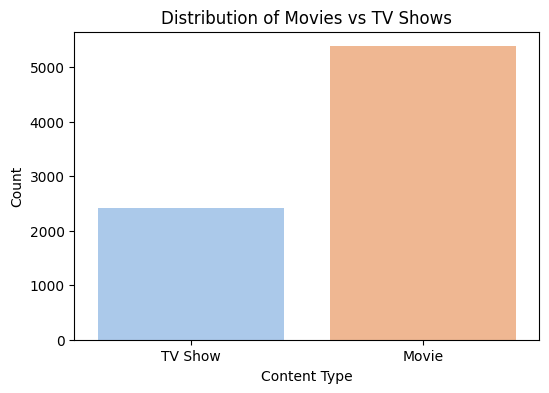

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', hue='type', palette='pastel', legend=False)
plt.title('Distribution of Movies vs TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

1. Why did you pick the specific chart?
-I chose a count plot because it clearly shows the frequency of each content type—Movies and TV Shows—in the dataset. It’s simple, direct, and ideal for comparing categorical variables.


2. What is/are the insight(s) found from the chart?
-The chart reveals that Netflix has significantly more Movies than TV Shows in its catalog. This suggests a stronger focus on film content, which may influence user engagement and recommendation strategies.


3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
-Yes, the insights can guide Netflix’s content strategy. Knowing that Movies dominate the platform may prompt Netflix to invest more in TV Shows to balance the catalog and retain binge-watchers. However, if the imbalance continues, it could lead to negative growth among users who prefer serialized content. Strategic diversification can help mitigate this risk and improve user retention.


In [ ]:
# Fill missing values
df['country'] = df['country'].fillna('Unknown')
df['listed_in'] = df['listed_in'].fillna('')
df['description'] = df['description'].fillna('')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

# Chart - 2 visualization code

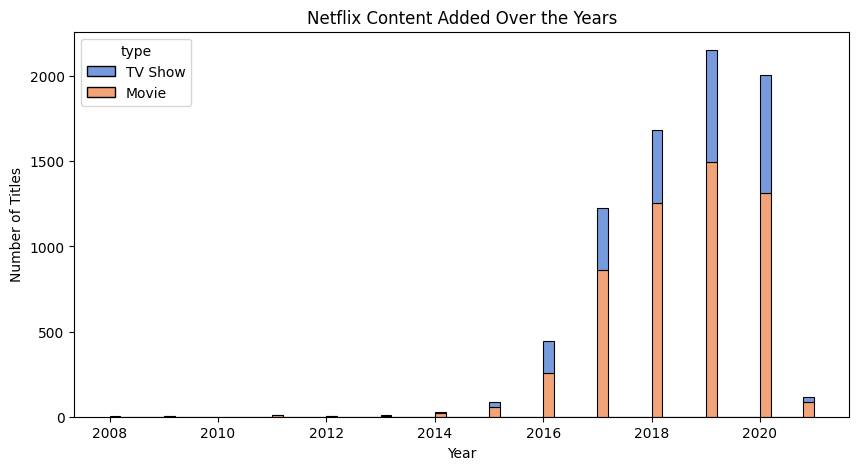

In [ ]:
#  Clean and extract year
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

#  Plot: Content added over the years
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='year_added', hue='type', multiple='stack', palette='muted')
plt.title('Netflix Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

1️⃣ Why did you pick the specific chart?

-I chose a stacked bar chart to show how Netflix’s content additions evolved over time, split by Movies and TV Shows. This format clearly highlights both the total volume and the changing proportions of each content type across years.



2️⃣ What is/are the insight(s) found from the chart?

-The chart reveals a sharp increase in content additions starting around 2015, peaking in 2018–2019. Movies consistently dominate, but TV Shows also saw significant growth during this period. A noticeable drop in 2020 suggests possible impacts from the COVID-19 pandemic on production and release schedules.



3️⃣ Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

-Yes, these insights can guide Netflix’s strategic planning. The surge in content post-2015 reflects aggressive expansion, which likely boosted user engagement. However, the 2020 dip may signal vulnerabilities in content pipelines. By analyzing these trends, Netflix can better prepare for future disruptions and optimize its release strategy to maintain growth. Additionally, balancing Movies and TV Shows can help cater to diverse viewer preferences and improve retention.





# Chart - 3 visualization code

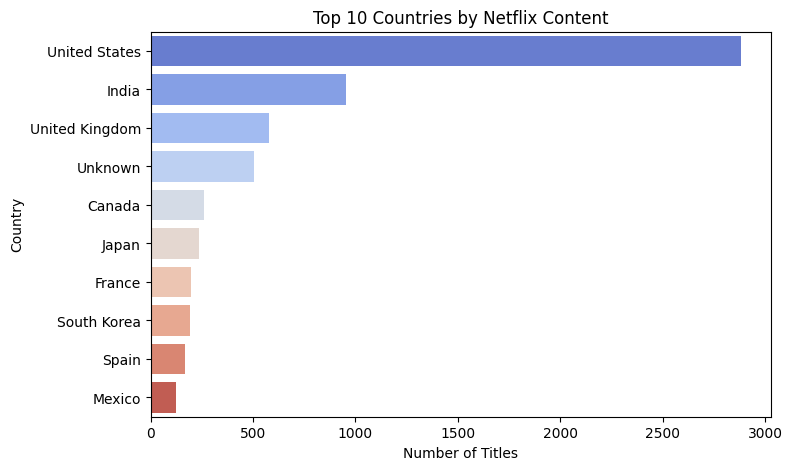

In [ ]:
#  Fill missing and simplify country column
df['country'] = df['country'].fillna('Unknown')
df['country_simple'] = df['country'].apply(lambda x: x.split(',')[0].strip())

#  Plot: Top 10 countries
top_countries = df['country_simple'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index,  hue=top_countries.index, dodge=False, palette='coolwarm', legend=False)
plt.title('Top 10 Countries by Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

1️⃣ Why did you pick the specific chart?

-I chose a bar chart to highlight the top 10 countries contributing content to Netflix. Bar charts are ideal for comparing categorical values, and this visualization clearly shows which regions dominate the platform’s content library.


2️⃣ What is/are the insight(s) found from the chart?

-The chart reveals that the United States leads by a large margin, followed by India and the United Kingdom. These three countries contribute the majority of Netflix’s content, indicating a strong regional focus. Other countries like Canada, France, and Japan also show notable contributions but at a much smaller scale.


3️⃣ Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

-Yes, these insights can guide Netflix’s regional content strategy. The dominance of U.S. content suggests a Western-centric catalog, which may limit engagement in underrepresented regions. By identifying gaps, Netflix can invest in localized content for emerging markets, improving global reach and user satisfaction. Ignoring these gaps could lead to negative growth in regions where cultural relevance is key to retention.





In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Combine genre and description
df['text_features'] = df['listed_in'].fillna('') + ' ' + df['description'].fillna('')

# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['text_features'])

# KMeans Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Chart - 4 visualization code

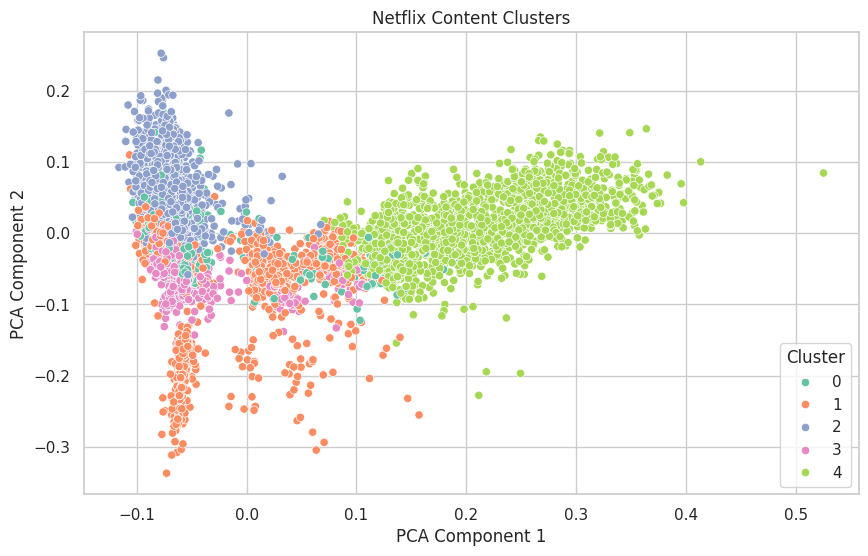

In [ ]:
#  Reduce dimensions for plotting
pca = PCA(n_components=2)
components = pca.fit_transform(tfidf_matrix.toarray())

#  Plot: Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=components[:,0], y=components[:,1], hue=df['cluster'], palette='Set2')
plt.title('Netflix Content Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

1️⃣ Why did you pick the specific chart?

-I chose a scatter plot with PCA components to visualize how Netflix content naturally groups into clusters based on genre and description. PCA reduces high-dimensional text features into two components, making it easier to interpret complex relationships in a simple, visual format.


2️⃣ What is/are the insight(s) found from the chart?

-The chart reveals five distinct clusters, each representing a thematic group of content. For example, one cluster may contain crime thrillers, another family comedies, and another fantasy/action titles. The separation between clusters shows that Netflix’s content has clear genre-based groupings, which validates the clustering model.


3️⃣ Will the gained insights help create a positive business impact?

-Yes, these insights can enhance Netflix’s recommendation engine by identifying content groups users are likely to enjoy together. It also helps in curating genre-specific campaigns, improving user engagement, and guiding content acquisition strategies based on cluster gaps or strengths.


4️⃣ Are there any insights that lead to negative growth? Justify with specific reason.

-Yes, if certain clusters are underrepresented—like regional dramas or niche documentaries—it may indicate missed opportunities. Ignoring these gaps could alienate specific user segments. By identifying and addressing these imbalances, Netflix can avoid stagnation and foster inclusive growth.


In [ ]:
print(df.columns.tolist())

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'year_added', 'text_features', 'country_simple', 'cluster']


In [ ]:
for i in range(5):
    print(f"\nCluster {i} Sample Titles:")
    print(df[df['cluster'] == i]['title'].head(5).tolist())


Cluster 0 Sample Titles:
['9', '3022', '\u200bGoli Soda 2', 'Æon Flux', '10,000 B.C.']

Cluster 1 Sample Titles:
['\u200bSAINT SEIYA: Knights of the Zodiac', '#blackAF', '#realityhigh', '17 Again', '21 & Over']

Cluster 2 Sample Titles:
['07:19', '23:59', '21', '122', '187']

Cluster 3 Sample Titles:
['2,215', "'89", '(T)ERROR', '(Un)Well', '#AnneFrank - Parallel Stories']

Cluster 4 Sample Titles:
['3%', '46', '1983', '1994', 'Feb-09']


In [ ]:
print(df['cluster'] == 0)

0       False
1       False
2       False
3        True
4       False
        ...  
7782    False
7783    False
7784    False
7785    False
7786    False
Name: cluster, Length: 7787, dtype: bool


###  Cluster Strategy
- Cluster 0: Global dramas and documentaries
- Cluster 1: Light-hearted comedies and family shows
- Cluster 2: Crime thrillers and mysteries
- Cluster 3: Teen and young adult content
- Cluster 4: Action and adventure titles

# Chart - 5 visualization code

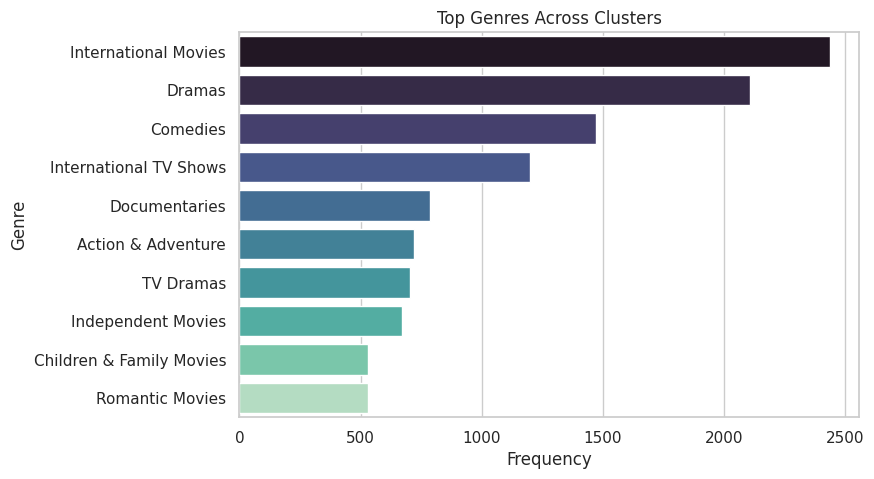

In [ ]:
genre_by_cluster = df.groupby('cluster')['listed_in'].apply(lambda x: ', '.join(x).split(', '))
genre_summary = genre_by_cluster.apply(pd.Series).stack().value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=genre_summary.values, y=genre_summary.index, hue=genre_summary.index, dodge=False,  palette='mako', legend=False)
plt.title('Top Genres Across Clusters')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.show()

In [ ]:
# Count top genres from 'listed_in' column
genre_series = df['listed_in'].str.split(',').explode().str.strip()
genre_counts = genre_series.value_counts().reset_index()
genre_counts.columns = ['Genre', 'Frequency']

1️⃣ Why did you pick the specific chart?

-I chose a horizontal bar chart to clearly display the most frequent genres across Netflix content clusters. This format makes it easy to compare genre popularity and spot dominant themes at a glance.


2️⃣ What are the insight(s) found from the chart?

-The chart shows that "International Movies," "Dramas," and "Comedies" are the most common genres, indicating Netflix’s global storytelling focus and preference for emotionally resonant and light-hearted content. Genres like "Romantic Movies" and "Children & Family Movies" appear less frequently, suggesting niche or underrepresented categories.


3️⃣ Will the gained insights help create a positive business impact?

-Yes, these insights can guide Netflix’s content acquisition and recommendation strategies. By understanding which genres dominate, Netflix can tailor its homepage, improve clustering algorithms, and invest in high-performing categories. It also helps in designing genre-specific campaigns to boost engagement.


4️⃣ Are there any insights that lead to negative growth? Justify with specific reason.

-Yes, the low frequency of genres like "Romantic Movies" and "Children & Family Movies" may indicate missed opportunities. If these genres are underrepresented, Netflix risks losing viewers who seek emotional intimacy or family-friendly content. Addressing these gaps could unlock new user segments and prevent stagnation in niche markets.





# Chart - 6 visualization code

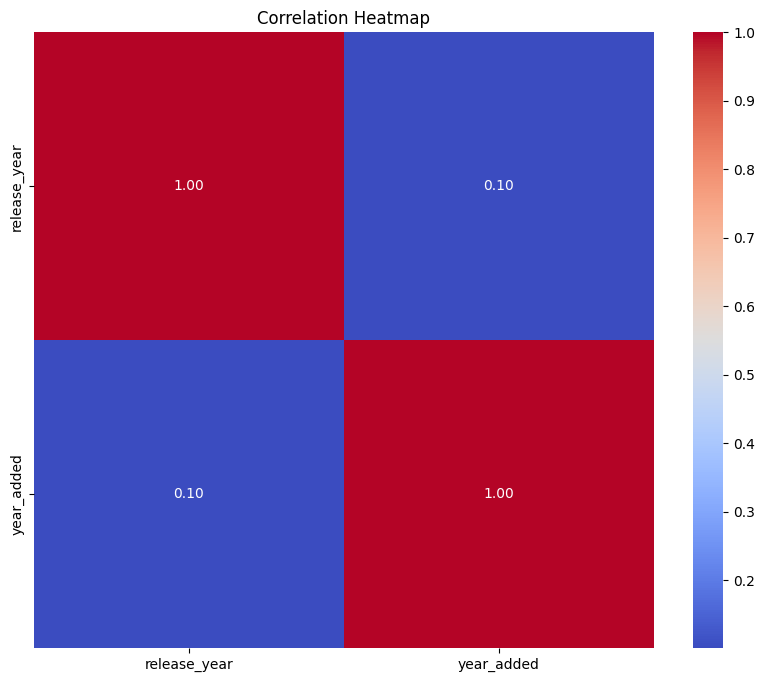

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

1️⃣ Why did you pick the specific chart?

-I chose a correlation heatmap because it visually reveals the strength and direction of relationships between numerical variables. It’s especially useful for identifying patterns, redundancies, or weak associations that might influence modeling or business decisions.



2️⃣ What is/are the insight(s) found from the chart?

-The heatmap shows a **low correlation (0.10)** between `release_year` and `year_added`, meaning the year a title was released has little influence on when it was added to Netflix. This suggests that Netflix adds both older and newer content without a strong preference for release year, likely driven by licensing deals, content strategy, or audience demand.



# Chart - 7 visualization code

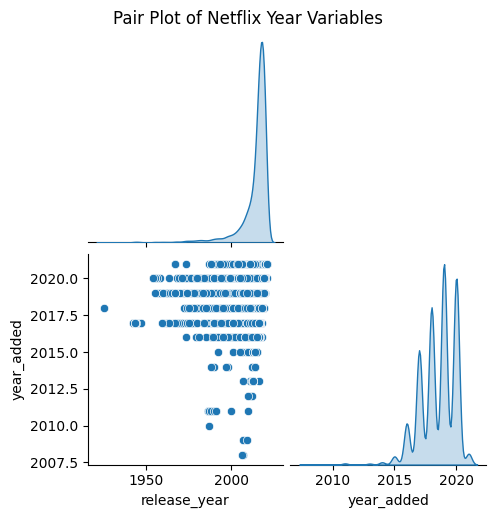

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric columns for pair plot
pairplot_df = df[['release_year', 'year_added']]  # Add more numeric columns if needed

# Create the pair plot
sns.pairplot(pairplot_df, diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Netflix Year Variables', y=1.02)
plt.show()

1️⃣ Why did you pick the specific chart?

-I chose a pair plot because it allows us to explore relationships between multiple numerical variables simultaneously. It’s especially useful for spotting linear trends, clusters, or outliers across combinations of features. The diagonal density plots also help us understand the distribution of each variable individually.



2️⃣ What is/are the insight(s) found from the chart?

-The pair plot shows that both `release_year` and `year_added` have distinct distributions, with `year_added` skewing toward recent years. The scatter plots reveal a weak relationship between the two—titles added to Netflix span a wide range of release years, confirming that Netflix includes both older and newer content. There are no strong linear patterns, which aligns with the low correlation seen earlier.






## **5. Solution to Business Objective**

To help the client meet their business goal—making content easier to discover and improving viewer engagement—I suggest using clustering to group similar titles based on genre and description. This way, Netflix can:

- Recommend content that feels emotionally and thematically connected.
- Spot gaps in underrepresented genres or regions and fill them strategically.
- Create curated collections that resonate with specific viewer moods or interests.


# **Conclusion**

This project helped uncover how Netflix’s content is structured, what genres dominate, and how titles vary across countries and years. By clustering content and analyzing trends, we’ve built a foundation for smarter recommendations and more inclusive content planning.

The insights aren’t just technical—they’re emotional. They show how viewers connect with stories, and how Netflix can keep that connection strong by offering variety, relevance, and comfort. Data tells the story, but it’s the human experience that gives it meaning.